#### Université d’Orléans -- Licence 1 semestre 1 -- 2024-25  <br> Algorithmique et Programmation 1      
<h3 align="center">TP 02</h3>


# Exercice 1 - Travaux sur les triangles

Dans cet exercice, on étudie des triangles dont les sommets sont des points à coordonnées de type float.
Un des calculs importants de cet exercice : la distance entre deux points A(xA, yA) et B(xB, yB).
 
1. Définissez une fonction *distance*, qui prend en paramètres 4 float xA, yA, xB, yB et qui retourne la distance entre A(xA, yA) et B(xB, yB).

2. Définissez une fonction *perimetre* qui prend en paramètres 6 float xA, yA, xB, yB, xC, yC et qui retourne le périmètre du triangle défini par les points A(xA, yA), B(xB, yB) et C(xC, yC).

3. Faites des recherches sur la "Formule de Héron", qui permet de calculer l'aire intérieure d'un triangle, à partir de son demi-périmètre et de la longueur des 3 côtés. Écrivez une fonction *aire* qui prend en paramètres 6 float xA, yA, xB, yB, xC, yC et qui retourne l'aire du triangle ABC. 

4. Dessinez au brouillon un triangle ABC, et placez un point M à l'intérieur du triangle. Donnez ensuite de façon intuitive une condition sur les aires de ABC, ABM, BCM et ACM pour exprimer que M est intérieur à ABC.

5. Définissez une fonction *estInterieur* qui prend en paramètres 8 float xA, yA, xB, yB, xC, yC, xM, yM et qui retourne un booléen qui dit si M est intérieur à ABC.

6. Testez votre fonction à partir de situations simples et pour lesquelles on sait à coup sûr si M est intérieur à ABC.

7. Si certaines configurations ne fonctionnent pas, rappelez-vous que les calculs entre float peuvent générer des approximations... Améliorez votre fonction estInterieur pour palier à ces approximations en lui donnant une tolérance pour l'égalité entre float.


In [29]:
import math
def distance( xA , yA , xB , yB ):
    return math.sqrt ((xB - xA)**2 + ( yB - yA)**2 )

print(distance(2,-1,5,3)) # résultat = 5
print(distance(1, 2, 1, 5)) # résultat = 3
print(distance(0, 0, 1, 1)) # résultat = 1.4

def perimetre(xA, yA, xB, yB, xC, yC ):
    a= distance(xB , yB ,  xC, yC )
    b= distance(xA , yA ,  xC, yC )
    c= distance(xA , yA,  xB, yB )
    p = a + b + c
    return p
    
print(perimetre(1 ,2 , 5 , 2 , 5, -1))
print(perimetre(0 ,0 , 1 , 0 , 0, 1))

def aire(xA, yA, xB, yB, xC, yC ):
    p = perimetre(xA, yA, xB, yB, xC, yC ) / 2
    a= distance(xB , yB ,  xC, yC )
    b= distance(xA , yA ,  xC, yC )
    c= distance(xA , yA,  xB, yB )
    return math.sqrt(p*(p - a)*(p - b)*(p - c))

print(aire(1,2,5,2,5,-1))
print(aire(0,0,1,0,0,1))

 #def estInterieur (xA, yA, xB, yB, xC, yC ,xM , yM ):
   # return (aire(xA, yA, xB, yB, xC, yC)==(xA, yA, xB, yB, xM , yM) + (xB , yB ,  xC, yC , xM , yM) + (xA, yA , xC, yC , xM , yM))
"""
def estInterieur (xA, yA, xB, yB, xC, yC ,xM , yM ):
    res1 = aire(xA, yA, xB, yB, xC, yC) 
    res2 =(xA, yA, xB, yB, xM , yM) + (xB , yB ,  xC, yC , xM , yM) + (xA, yA , xC, yC , xM , yM)
    return res1 == res2

print(estInterieur(1 ,2,5,2,5,-1,4,1))
print(estInterieur(1 ,2,5,2,5,-1,2,0))
print(estInterieur(1 ,2,5,2,5,-1,4,1))
"""
def estInterieur2 (xA, yA, xB, yB, xC, yC ,xM , yM ):
    res1 = aire(xA, yA, xB, yB, xC, yC) 
    res2 = aire(xA, yA, xB, yB, xM , yM) + aire(xB , yB ,  xC, yC , xM , yM) + aire(xA, yA , xC, yC , xM , yM)
    tolerance = 1e-8
    return abs(res1 - res2) < tolerance

print(estInterieur2(1 ,2,5,2,5,-1,4,1))
print(estInterieur2(1 ,2,5,2,5,-1,2,0))
print(estInterieur2(1 ,2,5,2,5,-1,4,1))
    

5.0
3.0
1.4142135623730951
12.0
3.414213562373095
6.0
0.4999999999999998
True
False
True


# Exercice 2 - Face à face dans un couloir

Deux personnes se croisent dans un couloir étroit, où il est tout juste possible de se croiser à
deux. Ces deux personnes se voient au dernier moment et constatent qu'elles sont face à face.
Chacune décide, ou non, de se décaler vers l'autre partie du couloir.

On estime qu'une personne qui constate que sa route est bouchée se décale dans 75 % des cas. De
plus, les deux personnes se décidant en même temps, elles le font sans savoir ce que l'autre
s'apprête à faire.

On partira du principe suivant : en cas de face à face, les personnes passent à la configuration suivante après une seconde. Ainsi, le nombre de phases aboutissant au débloquage est aussi le temps mis à se débloquer. 

On voudrait en savoir plus sur le temps qu'il faut pour débloquer la situation. 

Suggestions : 
- pour modéliser un événement qui se produit dans 75 % des cas, on peut tirer au hasard un float entre 0 et 1. S'il est entre 0 et 0.75, alors l'événement se réalise. S'il est supérieur à 0.75, il ne se réalise pas.
- pour modéliser une position dans le couloir, on peut utiliser une variable entière prenant comme valeurs 0 ou 1. Par exemple côté gauche = 0 et côté droit = 1.
- un débloquage correspond à deux variables "position" de valeurs différentes : 0 et 1 ou 1 et 0
- un bloquage correspond à deux variables "position" de valeurs égales : 0 et 0 ou 1 et 1

Prolongement :
- Et si les probabilités de changement de chacun ne valent pas 0.75 ? Si par exemple on a des probabilités pA et pB ? 

In [48]:
import random

A=0
B=0
temps = 0
pA= float(input("probabilité de changement pour A ?"))
pB= float(input("probabilité de changement pour B ?"))
print(A , B , temps)


# on change la position A et la position B 
while A == B:
    aleatoireA=random.random()
    aleatoireB=random.random()
    if aleatoireA <= 0.75 :
        A= 1 -A
    if aleatoireB <= 0.75 :
        B= 1 -B
    temps +=1
    print(A , B , temps)

print("temps =" ,temps)
   
  
            
        
        

probabilité de changement pour A ? 0.9
probabilité de changement pour B ? 0.8


0 0 0
1 0 1
temps = 1


# Exercice 3 - Comparaison de deux zones géométriques

On trace un quart de cercle de rayon 1. Sur chacun des deux bords droits du quart de cercle, on dessine un demi-cercle de rayon 0.5. Cela délimite plusieurs zones, dont la bleue et la rouge comme ci-dessous. Le quadrillage est dessiné tous les  en x et en y.

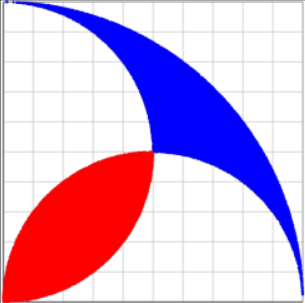

L'objectif de l'exercice est d'avoir un élément de comparaison de la taille de ces deux zones, qui ne soit pas basé sur des arguments de calcul géométrique (des calculs d'aires).

On utilisera un repère dont l'origine O(0,0) est le point inférieur gauche du graphique, et dont les coins sur les axes sont de coordonnées (1,0) et (0,1).

On pourra aussi utiliser les points importants A(0.5,0) et B(0,0.5).

1. Exprimer, en termes de distances, à quelle condition un point M(x,y) appartient à la zone bleue.
2. Même question pour un point M(x,y) de la zone rouge.

Par la suite, on va procéder à de multiples tirages aléatoires de points du carré de côté 10. En comptant combien de points tombent dans la zone rouge ou la zone bleue, on obtiendra un indice pour comparer ces zones.

3. écrivez des fonctions AM(x, y), BM(x, y) et OM(x, y) qui retournent, pour des x et y float entre 0 et 1, la valeur des distances AM, BM et OM.
4. écrivez les fonctions rouge(x, y) et bleue(x, y) qui retournent un booléen disant si oui ou non le point M(x, y) est dans la zone rouge (ou bleue).
5. écrivez le programme principal qui permet de comparer les deux zones.



exemple d'exécution :

nombre de points ? 10000

sur 10000 points : 
- 1464 points dans la zone rouge
- 1422 points dans la zone bleue

In [ ]:
import random 
def AM(x,y)
    return distance(0.5,0,x,y)

def BM(x,y)
    return distance(0,0.5,x,y)

def OM(x,y)
    return distance(0,0,x,y)

def rouge(x,y) :
    return AM(x,y) <= 0.5 and BM(x,y) <= 0.5

def bleu(x,y) :
    return AM(x,y) >= 0.5 and OM(x,y) <= 1 and BM(x,y) >= 0.5


    
    